# Sampling Methods

In [ ]:
import numpy as np
import pylab as plt

## Standard Distribution
### Exponential

>Transform the samples of an uniform distribution into samples from an exponential one (using the inversion method).
> $$p(x | \lambda)=\left\{\begin{array}{ll}
\lambda \mathrm{e}^{-\lambda x} & x \geq 0 \\
0 & x<0 \end{array}\right.$$

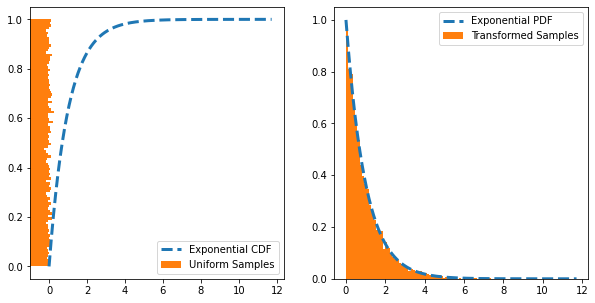

In [ ]:
class ExponentialDistribution:
    def __init__(self, lmb):
        self.lmb = lmb

    def pdf(self, x):
        return self.lmb*np.exp(-self.lmb*x)

    def cdf(self, x):
        return 1 - np.exp(-self.lmb*x)

    def inverse_cdf(self, x):
        return np.log(1 - x) / - self.lmb

    def sample(self, n_samples):
        z = np.random.uniform(0, 1, size=n_samples)
        y = self.inverse_cdf(z)
        return y

n_samples = 10000
dist = ExponentialDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.figure(figsize=(10, 5))
bins = 100
plt.subplot(121)
plt.hist(np.random.uniform(0, 1, n_samples), bins=bins, color='C1', density=True, orientation='horizontal', label='Uniform Samples', bottom=-1)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.cdf(axis), color='C0', label='Exponential CDF', linewidth=3, linestyle='--')
plt.legend()

plt.subplot(122)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.pdf(axis), color='C0', label='Exponential PDF', linewidth=3, linestyle='--')
plt.hist(y, bins=bins, density=True, color='C1', label='Transformed Samples')
plt.legend()
plt.show()

### Cosine
> Transform the samples of an uniform distribution into samples from the following pdf (using the inversion method):
> $$p(x) = \left\{\begin{array}{lll}
0 & x<0 \\
\cos (x)& x \in [0, \pi/2] \\
0 & x>\pi/2
\end{array}\right.$$

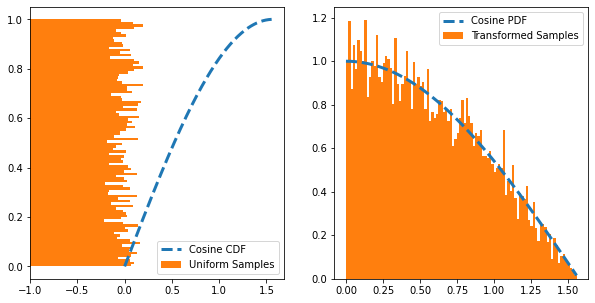

In [ ]:
class CosineDistribution:
    def __init__(self, lmb):
        self.lmb = lmb

    def pdf(self, x):
        return np.cos(x)

    def cdf(self, x):
        return np.sin(x)

    def inverse_cdf(self, x):
        return np.arcsin(x)

    def sample(self, n_samples):
        z = np.random.uniform(0, 1, size=n_samples)
        y = self.inverse_cdf(z)
        return y


n_samples=10000
dist = CosineDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.figure(figsize=(10, 5))
bins = 100
plt.subplot(121)
plt.hist(np.random.uniform(0, 1, n_samples), bins=bins, color='C1', density=True, orientation='horizontal', label='Uniform Samples', bottom=-1)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.cdf(axis), color='C0', label='Cosine CDF', linewidth=3, linestyle='--')
plt.legend()

plt.subplot(122)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.pdf(axis), color='C0', label='Cosine PDF', linewidth=3, linestyle='--')
plt.hist(y, bins=bins, density=True, color='C1', label='Transformed Samples')
plt.legend()
plt.show()

### Logistic Distribution
>Transform the samples of an uniform distribution into samples from the following pdf (using the inversion method):
>$$p(x) = \frac{e^{-x}}{\left(1+e^{-x}\right)^{2}} \quad F(x) = \frac{1}{1+e^{-x}}$$

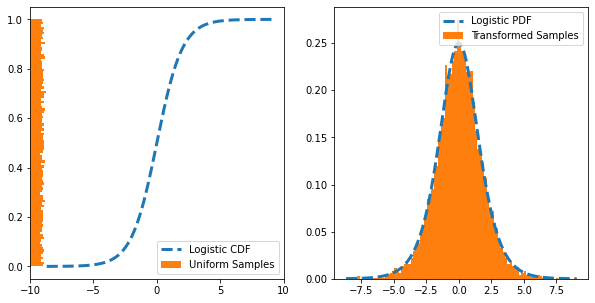

In [ ]:
class LogisticDistribution:
    def __init__(self, lmb):
        self.lmb = lmb

    def pdf(self, x):
        return np.exp(-x) / (1 + np.exp(-x))**2

    def cdf(self, x):
        return 1 / (1 + np.exp(-x))

    def inverse_cdf(self, x):
        x = np.clip(x, 1e-10, 1 - 1e-10)
        return - np.log(1 / x - 1)

    def sample(self, n_samples):
        z = np.random.uniform(0, 1, size=n_samples)
        y = self.inverse_cdf(z)
        return y


n_samples = 10000
dist = LogisticDistribution(lmb=1)
y = dist.sample(n_samples)

# Plot the samples
plt.figure(figsize=(10, 5))
bins = 100
plt.subplot(121)
plt.hist(np.random.uniform(0, 1, n_samples), bins=bins, color='C1', density=True, orientation='horizontal', label='Uniform Samples', bottom=-10)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.cdf(axis), color='C0', label='Logistic CDF', linewidth=3, linestyle='--')
plt.legend()

plt.subplot(122)
axis = np.linspace(y.min(), y.max(), 201)
plt.plot(axis, dist.pdf(axis), color='C0', label='Logistic PDF', linewidth=3, linestyle='--')
plt.hist(y, bins=bins, density=True, color='C1', label='Transformed Samples')
plt.legend()
plt.show()

## Box Muller

> Implement the box muller algorithm to create samples from a **bivariate** normal distribution. Compare these samples, e.g., with a scatter plot.

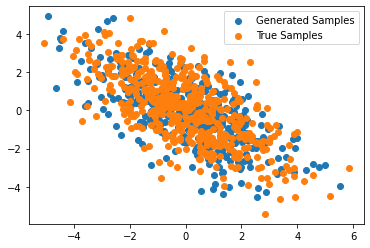

In [ ]:
class BoxMuller:
    def __init__(self, mean, cov):
        self.mean = np.array(mean)
        self.cov = np.array(cov)

    def sample(self, n_samples):
        # Sample uniformly from 2d box (-1, 1)
        z1 = np.random.uniform(0, 1, n_samples)*2 - 1
        z2 = np.random.uniform(0, 1, n_samples)*2 - 1

        # Discard the ones not lieing in unit circle
        idx = z1**2 + z2**2 <= 1
        z1, z2 = z1[idx], z2[idx]

        # Transform into gaussian
        r2 = z1**2 + z2**2
        m = np.sqrt((-2 * np.log(r2) / r2))
        y1 = z1 * m
        y2 = z2 * m
        samples = np.stack((y1, y2), axis=1)

        # Transform with mean and cov (use cholesky decomp)
        L = np.linalg.cholesky(self.cov)
        samples = self.mean + samples @ L.T

        return samples

np.random.seed(1)
n_samples = 500
mean = [0, 0]
cov = [[3, -2], [-2, 3]]

box_muller = BoxMuller(mean=mean, cov=cov)
generated_samples = box_muller.sample(n_samples)
true_samples = np.random.multivariate_normal(mean, cov, n_samples)

plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label='Generated Samples')
plt.scatter(true_samples[:, 0], true_samples[:, 1], label='True Samples')
plt.legend()
plt.show()

## Box Muller for Mixture of Gaussians - Ancestral Sampling

> Extend the code above to create samples from a mixture of Gaussians.

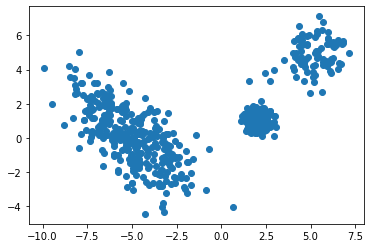

In [ ]:
coefs = [0.1, 0.4, 0.5]
means = [[5, 5], [-5, 0], [2, 1],]
covs = [
    [[1, 0], [0, 1]],
    [[3, -2], [-2, 3]],
    [[.1, 0], [0, .1]],
]
sample_size = 200

class AncestralBoxMuller:
    def __init__(self, coefs, means, covs):
        self.coefs = np.array(coefs)
        self.mean = np.array(means)
        self.covs = np.array(covs)

    def sample(self, n_samples):
        prior_samples = np.random.choice(range(len(self.coefs)), p=self.coefs, size=n_samples)

        clusters, n_samples_per_cluster = np.unique(prior_samples, return_counts=True)
        samples = []
        for i_cluster, n_samples in zip(clusters, n_samples_per_cluster):
            box_muller = BoxMuller(self.mean[i_cluster], self.covs[i_cluster])
            samples.append(box_muller.sample(n_samples))
        return np.concatenate(samples)


samples = AncestralBoxMuller(coefs, means, covs).sample(1000)
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()

## Rejection Sampling

> Implement rejection sampling that allows the generation of samples from $p(z)$ using a proposal distribution $q$. Plot your samples to confirm your result.
> How is the selection of the proposal function effecting the efficiency of the rejection sampling algorithm?

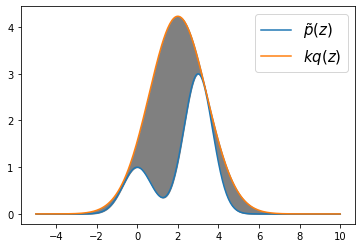

In [ ]:
from scipy.stats import norm as gauss
np.random.seed(42)


k = 15
# You can use q_dist.rvs to sample from the Gaussian.
q_dist = gauss(loc=np.array([2.]), scale=np.sqrt([2]))
def p_dist(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)


axis = np.linspace(-5, 10, 301)
plt.plot(axis, p_dist(axis), label=r"$\tilde{p}(z)$")
plt.plot(axis, k * q_dist.pdf(axis), label=r"$kq(z)$")
plt.fill_between(axis, p_dist(axis), k * q_dist.pdf(axis), color="gray")
plt.legend(fontsize=15)
plt.show()

In [ ]:
class RejectionSampling:
    def __init__(self, p_dist, q_dist, k):
        """Rejection sampling.

        Args:
            p_dist: (un)normalized (unknown) distribution
            q_dist: simple distribution for generating samples that may be rejected
            k (float): constant to be multiplied with the simple distribution
        """
        self.p_dist = p_dist
        self.q_dist = q_dist
        self.k = k

    def sample(self, n_samples):
        sample = []
        while len(sample) < n_samples:
            z0 = q_dist.rvs(size=(n_samples, 1))
            u0 = np.random.uniform(0, self.k * self.q_dist.pdf(z0))
            reject_idx = u0 > self.p_dist(z0)
            sample.extend(z0[~reject_idx])
        sample = np.array(sample)[:n_samples]
        return sample

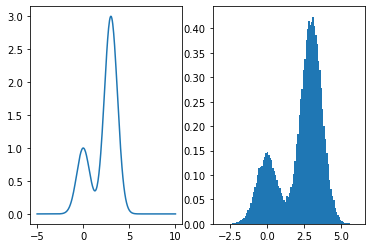

In [ ]:
n_samples = 100000
rejection_sampling = RejectionSampling(p_dist, q_dist, k)
samples = rejection_sampling.sample(n_samples)
plt.subplot(121)
plt.plot(axis, p_dist(axis), label=r"$\tilde{p}(z)$")
plt.subplot(122)
plt.hist(samples, density=True, bins=100)
plt.show()